In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("Data/clean_data.csv", index_col=  "Index")

#  Get dummies

In [28]:
df_dum = pd.get_dummies(df,drop_first=True)

In [29]:
df["Vehicle_model"].value_counts().tail(50)

Rifter                154
B-MAX                 153
Freemont              152
Antara                152
Signum                152
Lodgy                 150
Focus C-Max           147
Transit               147
Golf Sportsvan        147
Legacy                147
500L                  146
Exeo                  144
Q2                    144
Elantra               144
Ignis                 142
Tourneo Custom        140
Dokker                139
Range Rover Sport     137
A4 Allroad            136
Jimny                 133
Sedici                130
Mito                  130
RX                    129
DS4                   129
GL                    128
GS                    128
Pacifica              128
Challenger            126
301                   126
Ranger                123
X4                    123
Impreza               123
Land Cruiser          123
Passat CC             122
Giulia                121
Fox                   121
XC 70                 120
Range Rover Evoque    119
Agila       

In [30]:
df_dum

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
116465,42900,2015,125000.0,136.0,1598.0,5.0,48.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
116466,11900,2006,192547.0,140.0,1796.0,5.0,35.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
116467,25900,2010,119000.0,115.0,1598.0,5.0,32.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116468,8400,2007,290000.0,100.0,1910.0,5.0,25.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
116469,15999,2008,168779.0,115.0,1598.0,5.0,24.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,9800,2010,200000.0,68.0,995.0,5.0,21.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
36981,13800,2012,112644.0,68.0,1000.0,5.0,19.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
36984,11500,2011,126000.0,68.0,995.0,5.0,7.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = df_dum.drop(["Price"], axis = 1)

In [32]:
y = df_dum["Price"]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression()

In [38]:
preds = lm.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [40]:
y.mean()

47643.7039829407

In [41]:
mean_absolute_error(y_test,preds)

11907.957462866307

In [42]:
#12206

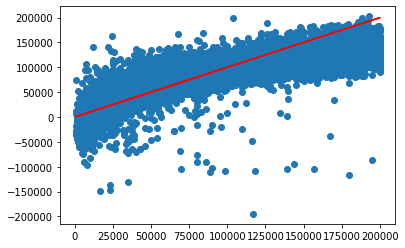

In [43]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

In [44]:
lm

LinearRegression()

In [45]:
coef_names = pd.DataFrame(X.columns)

In [46]:
coef_val = pd.DataFrame(lm.coef_)

In [47]:
coefs_df = pd.concat([coef_names,coef_val],axis = 1)

In [48]:
coefs_df.columns = ["Name","Value"]

In [49]:
coefs_df.set_index("Name").sort_values(by = "Value")

,Value
Name,
Vehicle_brand_Mazda,-55487.498692
Vehicle_model_Twingo,-42533.797632
Vehicle_model_Clio,-41042.871054
Vehicle_model_Captur,-35423.370828
Vehicle_model_Megane,-33889.464556
...,...
Vehicle_model_6,58813.583052
Vehicle_model_Tourneo Custom,59279.330498
Vehicle_model_Land Cruiser,60769.736725


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
X_train = scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
lm.fit(X_train,y_train)

LinearRegression()

In [55]:
preds = lm.predict(X_test)

In [56]:
mean_absolute_error(y_test,preds)

11911.014669741935

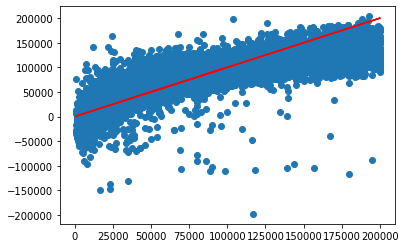

In [57]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
forest = RandomForestRegressor()

In [60]:
forest.fit(X_train,y_train)

RandomForestRegressor()

In [61]:
preds = forest.predict(X_test)

In [62]:
mean_absolute_error(y_test,preds)

5698.801975493866

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
grid_params = {
    "n_estimators": [100,200,250],  
}

In [65]:
#Lot of time!!!
#grid_forest = GridSearchCV(forest, param_grid=grid_params)

In [66]:
#grid_forest.fit(X_train,y_train)

In [67]:
#preds = grid_forest.predict(X_test)

In [69]:
#grid_forest.best_params_

In [70]:
mean_absolute_error(y_test,preds) 

5698.801975493866

In [72]:
y_test.mean()

47824.84036009002

In [73]:
mean_absolute_error(y_test,preds) / y_test.mean()

0.11915987450424474

In [74]:
forest = RandomForestRegressor(n_estimators=300,min_impurity_decrease=0.01)

In [75]:
forest.fit(X_train,y_train)

RandomForestRegressor(min_impurity_decrease=0.01, n_estimators=300)

In [76]:
preds = forest.predict(X_test)

In [77]:
mean_absolute_error(y_test,preds) 

5678.327067837249

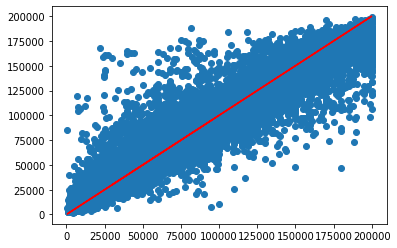

In [78]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

In [79]:
df.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,,
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0
